# Introducción al Análisis Exploratorio de Datos

Es un enfoque que comprende un conjunto de tareas para analizar conjuntos de datos para poder encontrar sus principales caracteristicas.

Estas tareas en general comprenden todo lo que tenemos que hacer desde que se formula una pregunta interesante, se reunen los datos y se desarrolla el proceso necesario para **poder responder esa pregunta**.

Su Objetivo es:

- Entender los datos.
- Ver caracteristicas de los datos.
- Detectar irregularidades (outliers) de los datos.
- Obtener valores estadisticos de los datos.
- Realizar visualizaciones rapidas que faciliten el proceso de exploracion.

Usualmente el resultado del mismo suele ser un reporte o un notebook, que reune codigo y visualizaciones para llegar a ciertas **conclusiones o insights**.

Es un proceos iterativo, que se retroalimenta.

En general realizaremos el análisis del mismo sobre un Dataframe.

## Dataframes

Conjunto de Datos en forma matricial (tabla) en don cada fila corresponde a una observacion (dato) y cada columna es un atributo correspondiente al dato (feature).

Los Dataframes tienen columnasUna columna es un vector de tamaño fijo de elementos de un mismo tipo acompañados de un indice para los mismos.

Se pueden realizar muchas operaciones sobre una columna.

operaciones matematicas o estadisticas sobre vectores como la:

- sumatoria
- promedio
- mediana
- varianza
- desviación standard.

Esto se puede aplicar una funcion a cada elemento de la columna (**map**) o aplicar una funcion a la columna entera (**apply**) en donde recibimos un vector (representando la columna) y podemos devolver un valor o un vector.

## Pandas

Implementacion de data frames (y otras estructuras de datos) en python que provee herramientas para facilitar el analisis de datos en el mundo real.

Es la implementacion que usaremos para dar nuestros primeros pasos con data frames y brindar herramientas para realizar un analisis exploratorio de datos.

Mas informacion en: [https://pypi.python.org/pypi/pandas](https://pypi.python.org/pypi/pandas)

Independientemente que la clase es una guia practica para comenzar a utilizar pandas, les recomendamos la siguiente documentacion:

- **Basics**: [http://pandas.pydata.org/pandas-docs/stable/basics.htmlhttp://pandas.pydata.org/pandas-docs/stable/basics.html](http://pandas.pydata.org/pandas-docs/stable/basics.htmlhttp://pandas.pydata.org/pandas-docs/stable/basics.html)
- **Data Merging**: [http://pandas.pydata.org/pandas-docs/stable/merging.html](http://pandas.pydata.org/pandas-docs/stable/merging.html)
- **Split-Apply-Combine**: [http://pandas.pydata.org/pandas-docs/stable/groupby.html](http://pandas.pydata.org/pandas-docs/stable/groupby.html)
- **Visualizacion**: [http://pandas.pydata.org/pandas-docs/stable/visualization.html](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
- **Pandas SQL Comparison**: [http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html#compare-with-sql-join](http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html)

## Analisis Exploratorio de Datos: Flight Delays

Para comenzar a trabajar en la distintas operaciones que podemos realizar con un data frame vamos a trabajar con el siguiente set de datos:

[https://www.kaggle.com/usdot/flight-delays](https://www.kaggle.com/usdot/flight-delays)

El set de datos contiene informacion sobre retrasos de vuelos y cancelaciones durante el año 2015.

In [1]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

### Carga de Informacion en un Dataframe

Pandas soporta distintas fuentes de informacion en distintos formatos (desde archivos de csv, excel, hasta fuentes remotas como urls o bases de datos, etc.). En este caso vamos a cargar la informacion desde un CSV que hemos descargado previamente de kaggle. Esto lo podemos hacer con pandas con ```read_csv```. 

Inicialmente podremos ver parte del data frame para tener idea de la estructura del mismo.

In [2]:
# carga de un data frame
#flights = pd.read_csv('../data/flight-delays/flights.csv', low_memory=False)
flights = pd.read_csv('../data/flight-delays/flights.csv', low_memory=False)

In [5]:
# vemos primeras filas del data frame
flights[:3]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#podemos los primeros valores
flights.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#y los ultimos
flights.tail(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819069,2015,12,31,4,B6,1248,N948JB,LAS,JFK,2359,...,1020.0,159.0,0,0,NaN,0.0,0.0,159.0,0.0,0.0
5819070,2015,12,31,4,B6,80,N584JB,RNO,JFK,2359,...,744.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819071,2015,12,31,4,B6,802,N589JB,SLC,MCO,2359,...,625.0,17.0,0,0,NaN,1.0,0.0,16.0,0.0,0.0
5819072,2015,12,31,4,B6,98,N607JB,DEN,JFK,2359,...,519.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819073,2015,12,31,4,B6,66,N655JB,ABQ,JFK,2359,...,549.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
flights.columns.values

array(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], dtype=object)

In [12]:
# si queremos analizar cuales son los valores de las columnas podemos obtenerlos con .columns
for name in flights.columns.values:
    print name

YEAR
MONTH
DAY
DAY_OF_WEEK
AIRLINE
FLIGHT_NUMBER
TAIL_NUMBER
ORIGIN_AIRPORT
DESTINATION_AIRPORT
SCHEDULED_DEPARTURE
DEPARTURE_TIME
DEPARTURE_DELAY
TAXI_OUT
WHEELS_OFF
SCHEDULED_TIME
ELAPSED_TIME
AIR_TIME
DISTANCE
WHEELS_ON
TAXI_IN
SCHEDULED_ARRIVAL
ARRIVAL_TIME
ARRIVAL_DELAY
DIVERTED
CANCELLED
CANCELLATION_REASON
AIR_SYSTEM_DELAY
SECURITY_DELAY
AIRLINE_DELAY
LATE_AIRCRAFT_DELAY
WEATHER_DELAY


Por otro lado muchas veces es necesario hacer algunas modificaciones en la forma en la que se cargan los datos del CSV dependiendo del formato del mismo, esto se puede hacer por ejemplo para ver como convertir datos (por ejemplo formatos de fechas), hasta tipos de separador, etc.


In [13]:
# por ejemplo se puede usar index_col para indicar un indice
airports = pd.read_csv('../data/flight-delays/airports.csv', sep=',', encoding='utf-8', index_col='IATA_CODE')
airports.head()

,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
IATA_CODE,,,,,,
ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [14]:
airlines = pd.read_csv('../data/flight-delays/airlines.csv', sep=',', encoding='utf-8')
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [27]:
nj_airports = airports[airports['STATE'] == 'NJ']

In [30]:
type(nj_airports)

pandas.core.frame.DataFrame

### Verificacion de Calidad de Datos

Algunas verificaciones que son utiles para ver la consistencia de los datos, en particular si vienen de una fuente de ese tipo.

Podemos verificar las dimensiones del data frame (via ```.shape```), si existen valores nulos (via ```.insnull```) en el mismo y metricas generales de las columnas o features del data frame que podemos analizar via ```.describe```


In [31]:
print(flights.shape)
print(airports.shape)
print(airlines.shape)

(5819079, 31)
(322, 6)
(14, 2)


In [37]:
print(airlines.isnull().any())
print(airports.isnull().any())

IATA_CODE    False
AIRLINE      False
dtype: bool
AIRPORT      False
CITY         False
STATE        False
COUNTRY      False
LATITUDE      True
LONGITUDE     True
dtype: bool


In [43]:
print(flights.isnull().any())

YEAR                   False
MONTH                  False
DAY                    False
DAY_OF_WEEK            False
AIRLINE                False
FLIGHT_NUMBER          False
TAIL_NUMBER             True
ORIGIN_AIRPORT         False
DESTINATION_AIRPORT    False
SCHEDULED_DEPARTURE    False
DEPARTURE_TIME          True
DEPARTURE_DELAY         True
TAXI_OUT                True
WHEELS_OFF              True
SCHEDULED_TIME          True
ELAPSED_TIME            True
AIR_TIME                True
DISTANCE               False
WHEELS_ON               True
TAXI_IN                 True
SCHEDULED_ARRIVAL      False
ARRIVAL_TIME            True
ARRIVAL_DELAY           True
DIVERTED               False
CANCELLED              False
CANCELLATION_REASON     True
AIR_SYSTEM_DELAY        True
SECURITY_DELAY          True
AIRLINE_DELAY           True
LATE_AIRCRAFT_DELAY     True
WEATHER_DELAY           True
dtype: bool


In [42]:
flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [44]:
print(flights.describe())

            YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
std          0.0  3.405137e+00  8.783425e+00  1.988845e+00   1.757064e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50%       2015.0  7.000000e+00  1.600000e+01  4.000000e+00   1.690000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  6.000000e+00   3.230000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.855000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.819079e+06    5.732926e+06     5.732926e+06  5.730032e+06   
mean          1.329602e+03    1.335204e+03     9.370158e+00  1.607166e+01   
std           4.837518e+02    4.964233e+02     3.708094e+01  8.895574e+00  

In [54]:
#algunas verificaciones

cancelled_flights_count = flights['CANCELLED'].sum()
#sobre el total de filas restamos aquellas que no tiene una cancelacion
flights_with_cancellation_reason = flights.shape[0] - flights.CANCELLATION_REASON.isnull().sum()

In [55]:
# solo vuelos cancelados tienen razon de cancelacion?
print(cancelled_flights_count)
print(flights_with_cancellation_reason)

89884
89884


### Cantidad de Vuelos a Aeropuertos de Destino

In [58]:
flights['DESTINATION_AIRPORT'][:3] #realizamos una proyeccion

0    SEA
1    PBI
2    CLT
Name: DESTINATION_AIRPORT, dtype: object

In [59]:
count_flights_to_airports = flights['DESTINATION_AIRPORT'].value_counts()

<IPython.core.display.Javascript object>


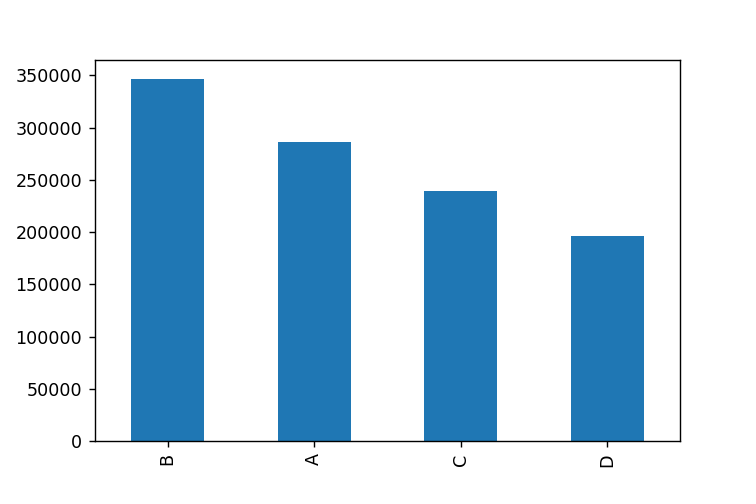

In [62]:
%matplotlib notebook
# top 20
count_flights_to_airports[:5].plot('bar')

In [65]:
airports[airports.index == 'DEN']

,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
IATA_CODE,,,,,,
DEN,Denver International Airport,Denver,CO,USA,39.85841,-104.667


### Que sucede yendo desde Los Angeles a Atlanta

In [68]:
# subsetting, filtering o seleccion
atl_flights = flights[flights['DESTINATION_AIRPORT'] == "ATL"]
atl_flights[:3]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
10,2015,1,1,4,DL,2336,N958DN,DEN,ATL,30,...,453.0,-30.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
13,2015,1,1,4,DL,2324,N3751B,SLC,ATL,40,...,553.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
atl_flights['DESTINATION_AIRPORT'].describe()

count     346904
unique         1
top          ATL
freq      346904
Name: DESTINATION_AIRPORT, dtype: object

In [70]:
# para entender como funciona veamos la expresion
flights['DESTINATION_AIRPORT'] == "ATL"

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9           True
10          True
11         False
12         False
13          True
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
5819049    False
5819050    False
5819051    False
5819052    False
5819053    False
5819054    False
5819055    False
5819056    False
5819057    False
5819058    False
5819059    False
5819060    False
5819061    False
5819062    False
5819063    False
5819064    False
5819065    False
5819066    False
5819067    False
5819068    False
5819069    False
5819070    False
5819071    False
5819072    False
5819073    False
5819074    False
5819075    False
5819076    Fal

In [71]:
atl_flights['AIRLINE'].value_counts()

DL    221673
EV     57056
WN     39508
AA      7499
F9      4492
NK      4372
OO      4227
UA      3412
US      2940
MQ      1295
AS       430
Name: AIRLINE, dtype: int64

In [75]:
airlines[airlines.IATA_CODE == 'F9']

,IATA_CODE,AIRLINE
3,F9,Frontier Airlines Inc.


In [76]:
# al indexar nuestro data frame con la columna de True y False solamente obtendremos aquellos con false.
# tambien es posible adicionar condiciones con operadores logicos
is_from_lax = flights['ORIGIN_AIRPORT'] == "LAX"
is_to_atl = flights['DESTINATION_AIRPORT'] == "ATL"
lax_to_atl_flights = flights[ is_from_lax & is_to_atl]
lax_to_atl_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
268,2015,1,1,4,DL,2154,N813DN,LAX,ATL,600,...,1250.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1269,2015,1,1,4,DL,369,N144DA,LAX,ATL,730,...,1423.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2425,2015,1,1,4,WN,1191,N7812G,LAX,ATL,900,...,1621.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2707,2015,1,1,4,DL,80,N845MH,LAX,ATL,915,...,1609.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4728,2015,1,1,4,DL,101,N826DN,LAX,ATL,1130,...,1856.0,16.0,0,0,NaN,0.0,0.0,16.0,0.0,0.0


In [77]:
lax_to_atl_flights['DESTINATION_AIRPORT'].describe()

count     5673
unique       1
top        ATL
freq      5673
Name: DESTINATION_AIRPORT, dtype: object

In [78]:
lax_to_atl_flights['CANCELLED'].value_counts()

0    5646
1      27
Name: CANCELLED, dtype: int64

<IPython.core.display.Javascript object>


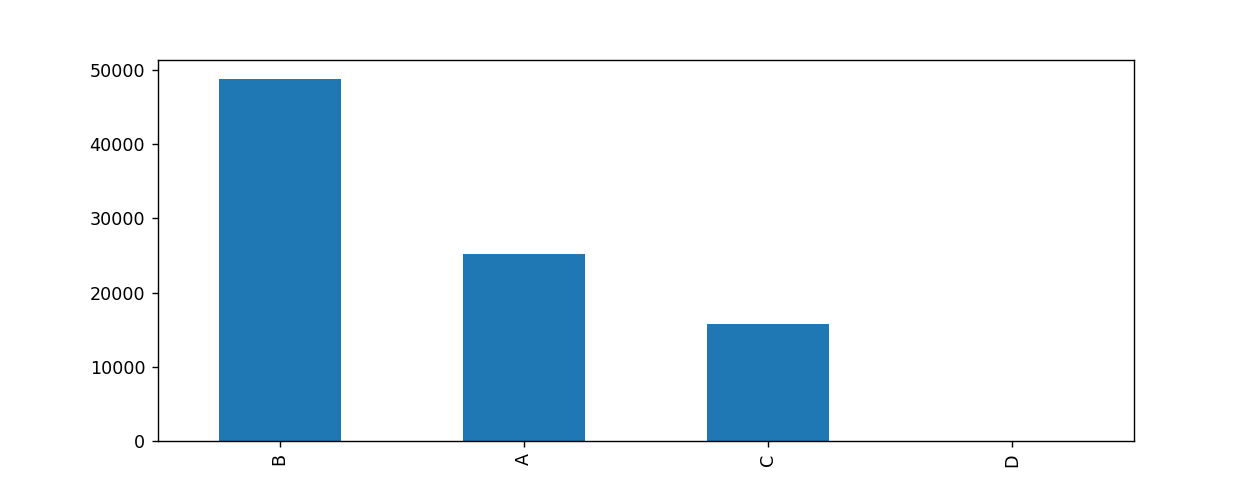

In [81]:
fig = plt.figure(figsize=(10,4));

flights['CANCELLATION_REASON'].value_counts().plot('bar')

## Que Aeropuerto de Origen tiene las mayor cantidad de cancelaciones

In [83]:
cancelled_flights['ORIGIN_AIRPORT'].value_counts()[:10]

ORD    8548
DFW    6254
LGA    4531
EWR    3110
BOS    2654
ATL    2557
LAX    2164
SFO    2148
IAH    2130
DEN    2123
Name: ORIGIN_AIRPORT, dtype: int64

In [112]:
flights_per_origin_count = flights['ORIGIN_AIRPORT'].count()

In [104]:
#flights_to_remove = flights_per_origin_count < 1000 

In [113]:
#flights_aux = flights[flights.ORIGIN_AIRPORT != flights_to_remove.index]

In [114]:
flights_per_origin_count = flights['ORIGIN_AIRPORT'].value_counts()
flights_cancelled_per_origin = cancelled_flights['ORIGIN_AIRPORT'].value_counts()

In [115]:
is_cancelled = flights['CANCELLED'] == 1
cancelled_flights = flights[is_cancelled]

In [116]:
flights_per_origin_count.tail()

13541    11
10165     9
14222     9
13502     6
11503     4
Name: ORIGIN_AIRPORT, dtype: int64

In [117]:
flights_cancelled_per_origin.tail()

12335    1
10620    1
10627    1
11977    1
14905    1
Name: ORIGIN_AIRPORT, dtype: int64

In [118]:
cancellation_ratio = flights_cancelled_per_origin.astype(float) / flights_per_origin_count.astype(float)

In [119]:
top_20_cancellation_ratio = cancellation_ratio.sort_values(ascending=False)[:20]

In [120]:
top_20_cancellation_ratio

ITH      0.117647
13964    0.111111
MMH      0.102564
10170    0.096774
SUN      0.092050
DVL      0.087619
CEC      0.084211
ASE      0.077485
MKG      0.073463
ADK      0.072917
JMS      0.072660
UST      0.070968
LAW      0.070624
15401    0.068182
TOL      0.067568
CMX      0.067365
PAH      0.066066
BPT      0.064748
12016    0.064516
13873    0.064516
Name: ORIGIN_AIRPORT, dtype: float64

Quitar Menores

### Cancelaciones por dia de la Semana

In [121]:
# split-apply-combine
flights.columns.values

array(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], dtype=object)

In [129]:
day_of_week = flights[['MONTH','CANCELLED']]
day_of_week

,MONTH,CANCELLED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [131]:
day_of_week_counts = day_of_week.groupby('MONTH')
day_of_week_counts = day_of_week.groupby('MONTH').aggregate(sum)
#day_of_week_counts.index = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
day_of_week_counts

,CANCELLED
MONTH,
1,11982
2,20517
3,11002
4,4520
5,5694
6,9120
7,4806
8,5052
9,2075


<IPython.core.display.Javascript object>


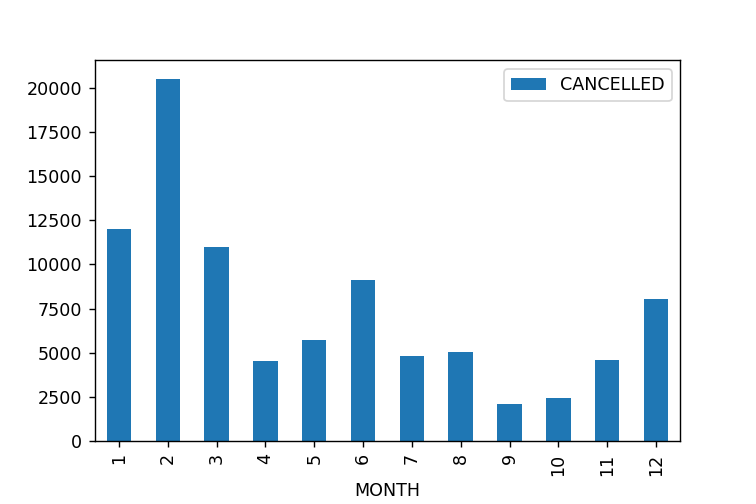

In [132]:
day_of_week_counts.plot(kind='bar')

<IPython.core.display.Javascript object>


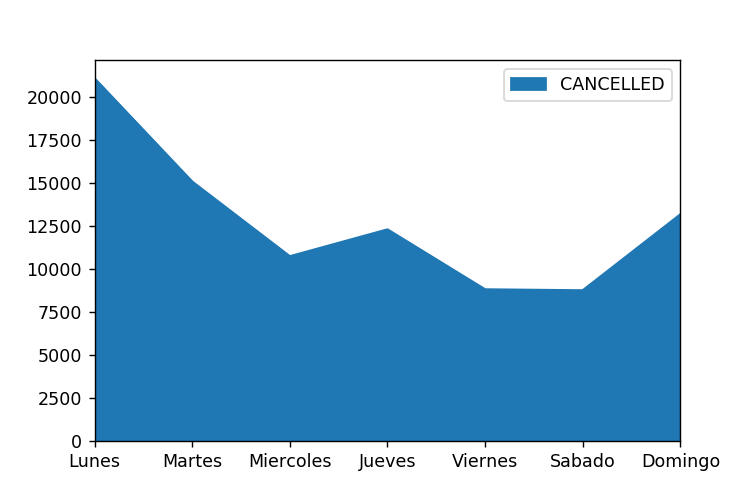

In [128]:
day_of_week_counts.plot(kind='area')

In [133]:
operated  = flights[['MONTH','CANCELLED']][flights['CANCELLED'] == 0].groupby('MONTH').count() # operated
cancelled = flights[['MONTH','CANCELLED']][flights['CANCELLED'] != 0].groupby('MONTH').count() # cancelled

In [134]:
operated

,CANCELLED
MONTH,
1,457986
2,408674
3,493310
4,480631
5,491299
6,494777
7,515912
8,505484
9,462871


In [135]:
operated.rename(columns={'CANCELLED': 'OPERATED'}, inplace=True)
operated

,OPERATED
MONTH,
1,457986
2,408674
3,493310
4,480631
5,491299
6,494777
7,515912
8,505484
9,462871


In [136]:
cancelled

,CANCELLED
MONTH,
1,11982
2,20517
3,11002
4,4520
5,5694
6,9120
7,4806
8,5052
9,2075


In [137]:
#merge por index, inner join
operated_and_cancelled = pd.merge(operated, cancelled, right_index=True, left_index=True)
operated_and_cancelled

,OPERATED,CANCELLED
MONTH,,
1,457986,11982
2,408674,20517
3,493310,11002
4,480631,4520
5,491299,5694
6,494777,9120
7,515912,4806
8,505484,5052
9,462871,2075


<IPython.core.display.Javascript object>


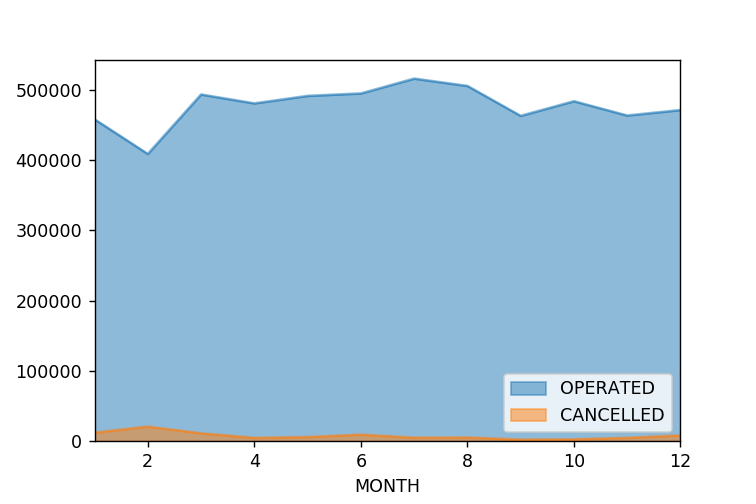

In [138]:
operated_and_cancelled.plot(kind="area", stacked=False)

<IPython.core.display.Javascript object>


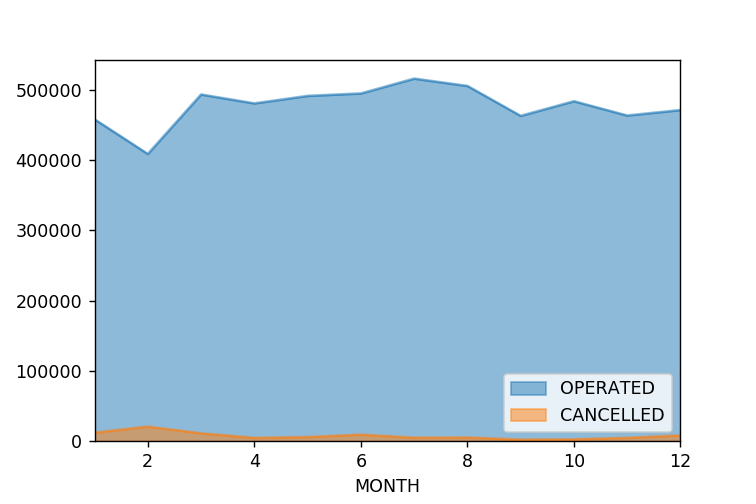

In [140]:
operated_and_cancelled.plot(kind="area", stacked=False)

<IPython.core.display.Javascript object>


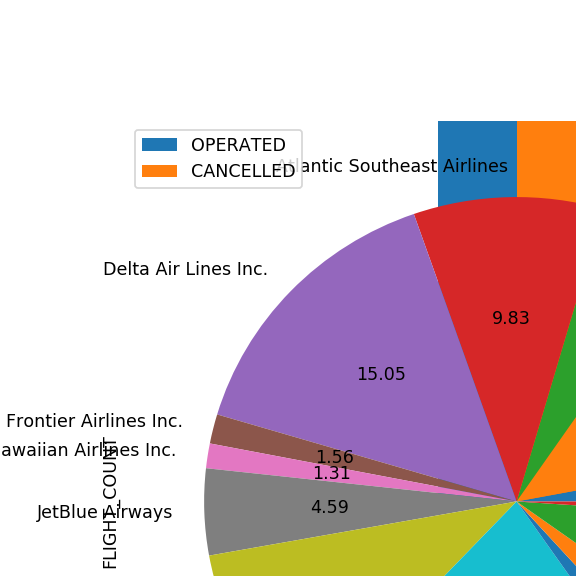

In [142]:
operated_and_cancelled.plot(kind="bar", stacked=False)

### Utilizando los nombres de las Aerolineas

In [147]:
# left join
flights_with_airlines = pd.merge(flights, airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')

In [148]:
flights_with_airlines.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.


In [149]:
#axis indica si se aplica sobre el indice o las columnas.
flights_with_airlines.drop('IATA_CODE', axis=1, inplace=True)
flights_with_airlines.rename(columns={'AIRLINE_x': 'AIRLINE_CODE','AIRLINE_y': 'AIRLINE'}, inplace=True)

In [150]:
flights_with_airlines.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.


### Cantidad de Vuelos por Aerolinea

In [161]:
airline_flight_count = pd.DataFrame({'FLIGHT_COUNT' : flights_with_airlines.groupby(['AIRLINE'])['FLIGHT_NUMBER'].count()}).reset_index()

In [162]:
airline_flight_count

,AIRLINE,FLIGHT_COUNT
0,Alaska Airlines Inc.,172521
1,American Airlines Inc.,725984
2,American Eagle Airlines Inc.,294632
3,Atlantic Southeast Airlines,571977
4,Delta Air Lines Inc.,875881
5,Frontier Airlines Inc.,90836
6,Hawaiian Airlines Inc.,76272
7,JetBlue Airways,267048
8,Skywest Airlines Inc.,588353
9,Southwest Airlines Co.,1261855


In [165]:
airline_flight_count.sort_values(by='FLIGHT_COUNT', ascending=True)

,AIRLINE,FLIGHT_COUNT
13,Virgin America,61903
6,Hawaiian Airlines Inc.,76272
5,Frontier Airlines Inc.,90836
10,Spirit Air Lines,117379
0,Alaska Airlines Inc.,172521
11,US Airways Inc.,198715
7,JetBlue Airways,267048
2,American Eagle Airlines Inc.,294632
12,United Air Lines Inc.,515723
3,Atlantic Southeast Airlines,571977


### Cantidad total de vuelos

In [166]:
airline_flight_total_count = airline_flight_count['FLIGHT_COUNT'].sum()
airline_flight_total_count

5819079

### Calculando el Porcentaje de Vuelos

In [167]:
airline_flight_count['AIRLINE_FLIGHT_PERCENTAGE'] = airline_flight_count['FLIGHT_COUNT'] / airline_flight_total_count

In [168]:
airline_flight_count

,AIRLINE,FLIGHT_COUNT,AIRLINE_FLIGHT_PERCENTAGE
0,Alaska Airlines Inc.,172521,0.029647
1,American Airlines Inc.,725984,0.124759
2,American Eagle Airlines Inc.,294632,0.050632
3,Atlantic Southeast Airlines,571977,0.098293
4,Delta Air Lines Inc.,875881,0.150519
5,Frontier Airlines Inc.,90836,0.015610
6,Hawaiian Airlines Inc.,76272,0.013107
7,JetBlue Airways,267048,0.045892
8,Skywest Airlines Inc.,588353,0.101108
9,Southwest Airlines Co.,1261855,0.216848


Podemos realizar tambien algunas verificaciones, como que los porcentajes cierren, etc.


<IPython.core.display.Javascript object>


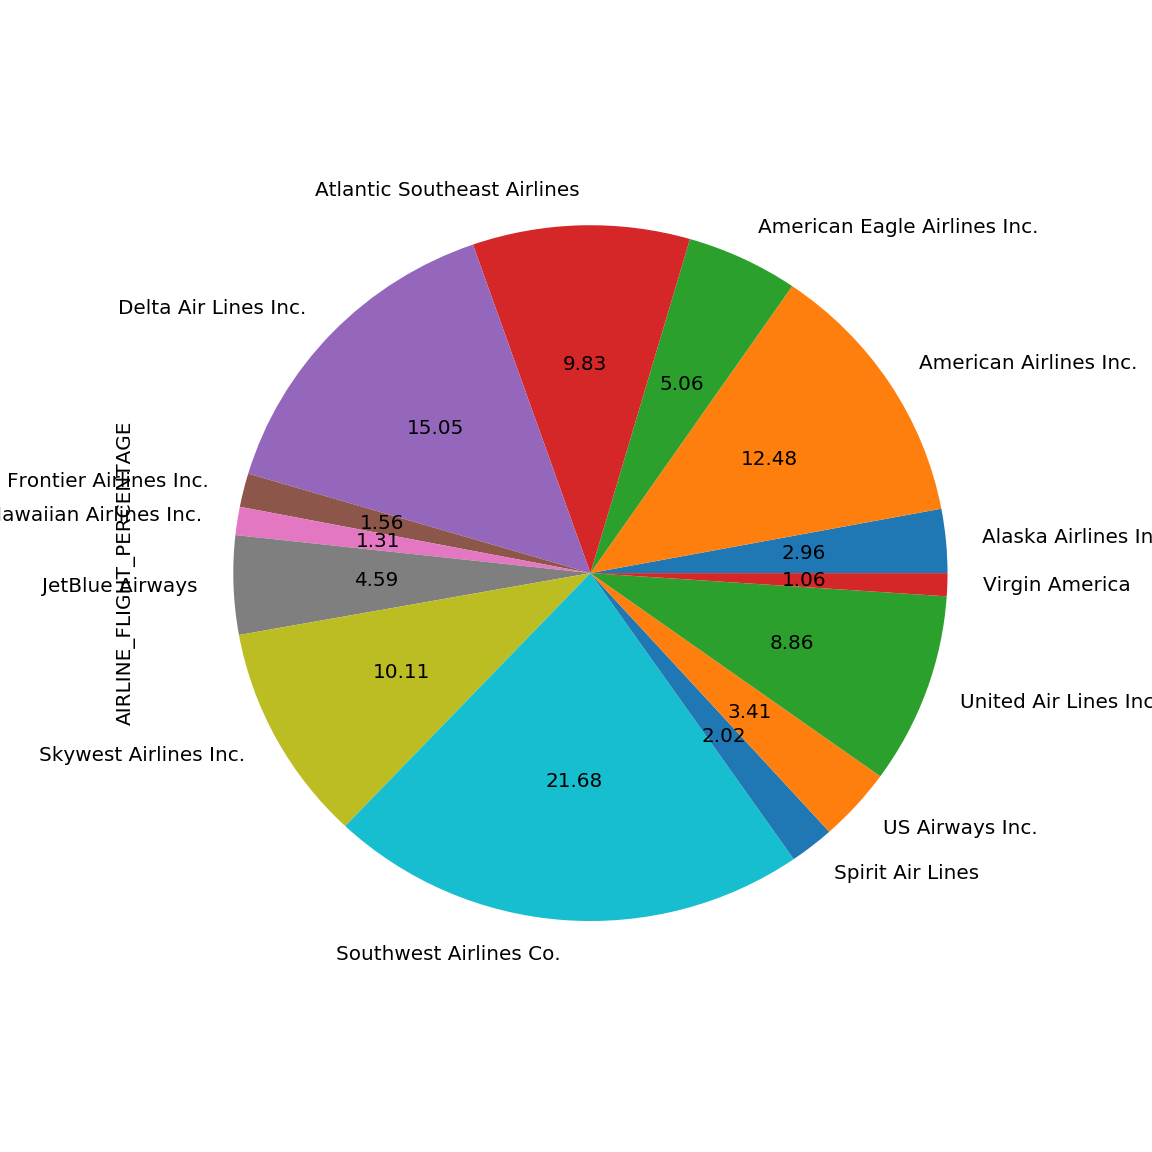

In [171]:
plt.figure()
#comparar porcentaje y totales
airline_flight_count.set_index(['AIRLINE'])['AIRLINE_FLIGHT_PERCENTAGE'].plot.pie(figsize=(8, 8),autopct='%.2f')

### Calculando Tasas de Cancelaciones por Aerolinea

In [172]:
airline_cancellation_rate = pd.DataFrame({'CANCELLATION_RATE' : flights_with_airlines.groupby(['AIRLINE'])['CANCELLED'].mean()}).reset_index()

In [173]:
airline_cancellation_rate

,AIRLINE,CANCELLATION_RATE
0,Alaska Airlines Inc.,0.003878
1,American Airlines Inc.,0.015040
2,American Eagle Airlines Inc.,0.050996
3,Atlantic Southeast Airlines,0.026629
4,Delta Air Lines Inc.,0.004366
5,Frontier Airlines Inc.,0.006473
6,Hawaiian Airlines Inc.,0.002242
7,JetBlue Airways,0.016012
8,Skywest Airlines Inc.,0.016929
9,Southwest Airlines Co.,0.012714


In [174]:
airline_divertion_rate = pd.DataFrame({'DIVERTION_RATE' : flights_with_airlines.groupby(['AIRLINE'])['DIVERTED'].mean()}).reset_index()
airline_divertion_rate

,AIRLINE,DIVERTION_RATE
0,Alaska Airlines Inc.,0.002394
1,American Airlines Inc.,0.002934
2,American Eagle Airlines Inc.,0.002770
3,Atlantic Southeast Airlines,0.003486
4,Delta Air Lines Inc.,0.002035
5,Frontier Airlines Inc.,0.001739
6,Hawaiian Airlines Inc.,0.000787
7,JetBlue Airways,0.002734
8,Skywest Airlines Inc.,0.002684
9,Southwest Airlines Co.,0.002702


### Juntando la Informacion en un mismo Data Frame

In [175]:
# left join
airline_ranking = pd.merge(airline_flight_count, airline_cancellation_rate, left_on='AIRLINE', right_on='AIRLINE', how='left')
airline_ranking

,AIRLINE,FLIGHT_COUNT,AIRLINE_FLIGHT_PERCENTAGE,CANCELLATION_RATE
0,Alaska Airlines Inc.,172521,0.029647,0.003878
1,American Airlines Inc.,725984,0.124759,0.015040
2,American Eagle Airlines Inc.,294632,0.050632,0.050996
3,Atlantic Southeast Airlines,571977,0.098293,0.026629
4,Delta Air Lines Inc.,875881,0.150519,0.004366
5,Frontier Airlines Inc.,90836,0.015610,0.006473
6,Hawaiian Airlines Inc.,76272,0.013107,0.002242
7,JetBlue Airways,267048,0.045892,0.016012
8,Skywest Airlines Inc.,588353,0.101108,0.016929
9,Southwest Airlines Co.,1261855,0.216848,0.012714


In [176]:
# left join
airline_ranking = pd.merge(airline_ranking, airline_divertion_rate, left_on='AIRLINE', right_on='AIRLINE', how='left')
airline_ranking

,AIRLINE,FLIGHT_COUNT,AIRLINE_FLIGHT_PERCENTAGE,CANCELLATION_RATE,DIVERTION_RATE
0,Alaska Airlines Inc.,172521,0.029647,0.003878,0.002394
1,American Airlines Inc.,725984,0.124759,0.015040,0.002934
2,American Eagle Airlines Inc.,294632,0.050632,0.050996,0.002770
3,Atlantic Southeast Airlines,571977,0.098293,0.026629,0.003486
4,Delta Air Lines Inc.,875881,0.150519,0.004366,0.002035
5,Frontier Airlines Inc.,90836,0.015610,0.006473,0.001739
6,Hawaiian Airlines Inc.,76272,0.013107,0.002242,0.000787
7,JetBlue Airways,267048,0.045892,0.016012,0.002734
8,Skywest Airlines Inc.,588353,0.101108,0.016929,0.002684
9,Southwest Airlines Co.,1261855,0.216848,0.012714,0.002702


### Visualizando el Ranking

In [178]:
airline_ranking_sorted = airline_ranking.sort_values(by='FLIGHT_COUNT',ascending=False)

In [179]:
airline_ranking_sorted

,AIRLINE,FLIGHT_COUNT,AIRLINE_FLIGHT_PERCENTAGE,CANCELLATION_RATE,DIVERTION_RATE
9,Southwest Airlines Co.,1261855,0.216848,0.012714,0.002702
4,Delta Air Lines Inc.,875881,0.150519,0.004366,0.002035
1,American Airlines Inc.,725984,0.124759,0.015040,0.002934
8,Skywest Airlines Inc.,588353,0.101108,0.016929,0.002684
3,Atlantic Southeast Airlines,571977,0.098293,0.026629,0.003486
12,United Air Lines Inc.,515723,0.088626,0.012745,0.002691
2,American Eagle Airlines Inc.,294632,0.050632,0.050996,0.002770
7,JetBlue Airways,267048,0.045892,0.016012,0.002734
11,US Airways Inc.,198715,0.034149,0.020466,0.002139
0,Alaska Airlines Inc.,172521,0.029647,0.003878,0.002394


In [180]:
airline_ranking_sorted.reset_index()

,index,AIRLINE,FLIGHT_COUNT,AIRLINE_FLIGHT_PERCENTAGE,CANCELLATION_RATE,DIVERTION_RATE
0,9,Southwest Airlines Co.,1261855,0.216848,0.012714,0.002702
1,4,Delta Air Lines Inc.,875881,0.150519,0.004366,0.002035
2,1,American Airlines Inc.,725984,0.124759,0.015040,0.002934
3,8,Skywest Airlines Inc.,588353,0.101108,0.016929,0.002684
4,3,Atlantic Southeast Airlines,571977,0.098293,0.026629,0.003486
5,12,United Air Lines Inc.,515723,0.088626,0.012745,0.002691
6,2,American Eagle Airlines Inc.,294632,0.050632,0.050996,0.002770
7,7,JetBlue Airways,267048,0.045892,0.016012,0.002734
8,11,US Airways Inc.,198715,0.034149,0.020466,0.002139
9,0,Alaska Airlines Inc.,172521,0.029647,0.003878,0.002394


Ver correlacion entre variables con scatter

<IPython.core.display.Javascript object>


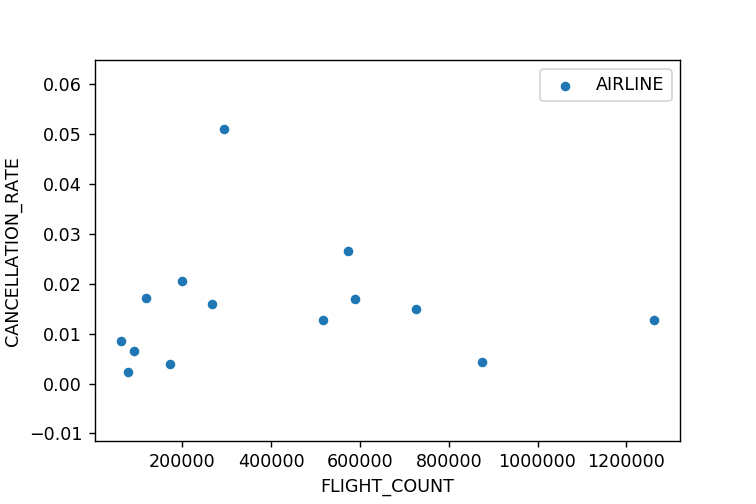

In [185]:
airline_ranking_sorted.plot.scatter(x='FLIGHT_COUNT',y='CANCELLATION_RATE', label='AIRLINE')

<IPython.core.display.Javascript object>


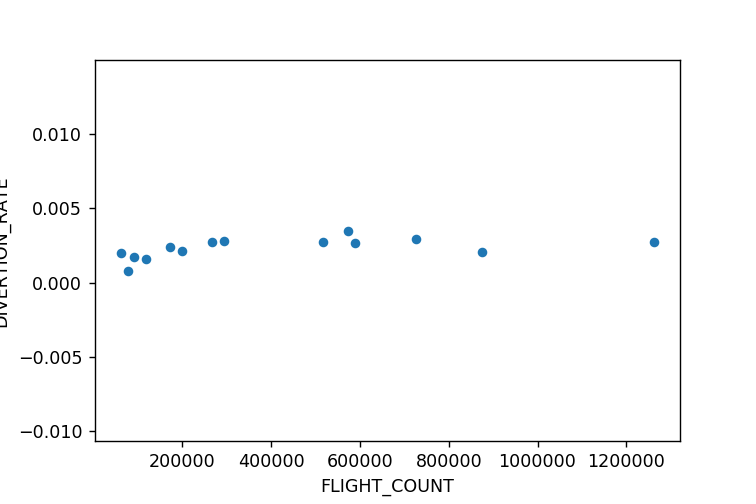

In [182]:
airline_ranking_sorted.plot.scatter(x='FLIGHT_COUNT',y='DIVERTION_RATE')

<IPython.core.display.Javascript object>


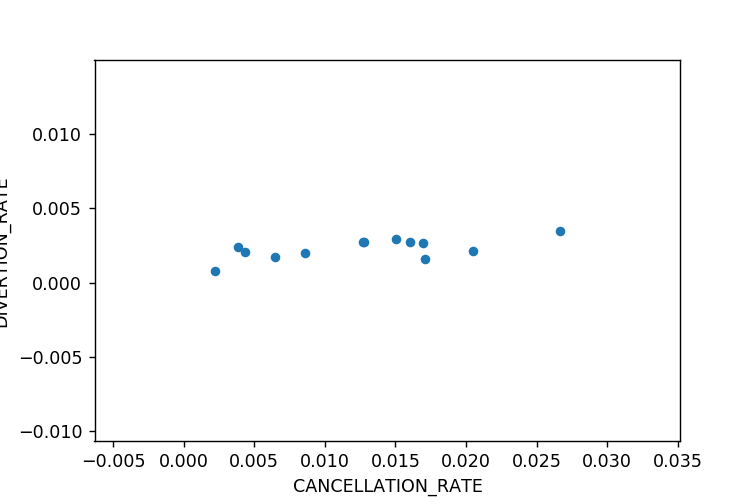

In [186]:
airline_ranking_sorted[airline_ranking_sorted.index != 2].plot.scatter(x='CANCELLATION_RATE',y='DIVERTION_RATE')

### Incorporando Fechas

In [187]:
flights_with_airlines['DATE'] = pd.to_datetime(flights[['YEAR','MONTH','DAY']], yearfirst=True)

In [188]:
flights_with_airlines.groupby('DATE').count()['SCHEDULED_DEPARTURE']

DATE
2015-01-01    13950
2015-01-02    16741
2015-01-03    15434
2015-01-04    16352
2015-01-05    16548
2015-01-06    15315
2015-01-07    15571
2015-01-08    16009
2015-01-09    16008
2015-01-10    12344
2015-01-11    14754
2015-01-12    15888
2015-01-13    15180
2015-01-14    15520
2015-01-15    16020
2015-01-16    16070
2015-01-17    12070
2015-01-18    13855
2015-01-19    15841
2015-01-20    15187
2015-01-21    15525
2015-01-22    16013
2015-01-23    16056
2015-01-24    12280
2015-01-25    14720
2015-01-26    15890
2015-01-27    15155
2015-01-28    15525
2015-01-29    16030
2015-01-30    16080
              ...  
2015-12-02    15860
2015-12-03    16278
2015-12-04    16215
2015-12-05    12200
2015-12-06    15101
2015-12-07    16043
2015-12-08    15575
2015-12-09    15849
2015-12-10    16259
2015-12-11    16263
2015-12-12    12239
2015-12-13    15116
2015-12-14    16056
2015-12-15    15670
2015-12-16    16100
2015-12-17    16579
2015-12-18    16710
2015-12-19    14724
2015-12-20    1

NonGuiException: 

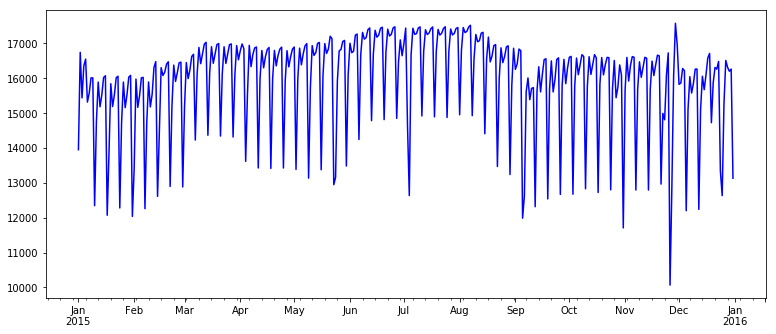

In [196]:
%matplotlib inline

fig = plt.figure(figsize=(10,4));

ax = fig.add_axes([0,0,1,1]);

flights_with_airlines.groupby('DATE').count()['SCHEDULED_DEPARTURE'].plot.line(c='b', label="scheduled");
flights_with_airlines[flights_with_airlines['CANCELLED'] == 0].groupby('DATE').count()['SCHEDULED_DEPARTURE'].plot.line(c='g', label="operated");
flights_with_airlines[flights_with_airlines['CANCELLED'] == 1].groupby('DATE').count()['SCHEDULED_DEPARTURE'].plot.line(c='r', label="cancelled");

ax.legend();

### Modificando los datos en data frame (map, apply)

In [197]:
# pandas.Series.map
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html

airline_ranking_sorted['AIRLINE_FLIGHT_PERCENTAGE'].map(lambda x: x * 100)

9     21.684789
4     15.051884
1     12.475926
8     10.110758
3      9.829339
12     8.862622
2      5.063207
7      4.589180
11     3.414887
0      2.964748
10     2.017141
5      1.561003
6      1.310723
13     1.063794
Name: AIRLINE_FLIGHT_PERCENTAGE, dtype: float64

In [198]:
## pandas.DataFrame.applymap
# hace sentido en dataframes a los que les podamos aplicar la funcion a cada elemento
# hace el mismo resultado que aplicar map por columna

am_df = pd.DataFrame(np.random.randn(3, 3))
am_df

,0,1,2
0,-0.094115,0.983466,0.834429
1,0.424227,0.274687,-1.267793
2,-0.615032,-2.139558,2.000307


In [199]:
am_df.applymap(lambda x: '%.2f' % x)

,0,1,2
0,-0.09,0.98,0.83
1,0.42,0.27,-1.27
2,-0.62,-2.14,2.00


In [200]:
## pandas.DataFrame.apply
# 

def normalize(col):
  mu = col.mean()
  return col.map(lambda x:x-mu)

a_df = pd.DataFrame(np.random.randn(3, 3))
a_df


,0,1,2
0,-0.264446,1.419228,0.593285
1,0.983152,-0.237418,0.430788
2,0.445477,-1.186073,0.134245


In [ ]:
a_df.apply(normalize)